<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20211006_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2, random
import numpy as np

img = cv2.imread('../data/bw.png', cv2.IMREAD_GRAYSCALE)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)

cv2.imshow('contours', color)
cv2.waitKey()
cv2.destroyAllWindows()

contour = contours[0]
image_to_show = np.copy(color)
measure = True

def mouse_callback(event, x, y, flags, param):
    global contour, image_to_show
    
    if event == cv2.EVENT_LBUTTONUP:
        distance = cv2.pointPolygonTest(contour, (x,y), measure)
        image_to_show = np.copy(color)
        if distance > 0:
            pt_color = (0, 255, 0)
        elif distance < 0:
            pt_color = (0, 0, 255)
        else:
            pt_color = (128, 0, 128)
        cv2.circle(image_to_show, (x,y), 5, pt_color, -1)
        cv2.putText(image_to_show, '%.2f' % distance, (0, image_to_show.shape[1] - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
cv2.namedWindow('contours')
cv2.setMouseCallback('contours', mouse_callback)

while(True):
    cv2.imshow('contours', image_to_show)
    k = cv2.waitKey(1)
    
    if k == ord('m'):
        measure = not measure
    elif k == 27:
        break
    
cv2.destroyAllWindows()

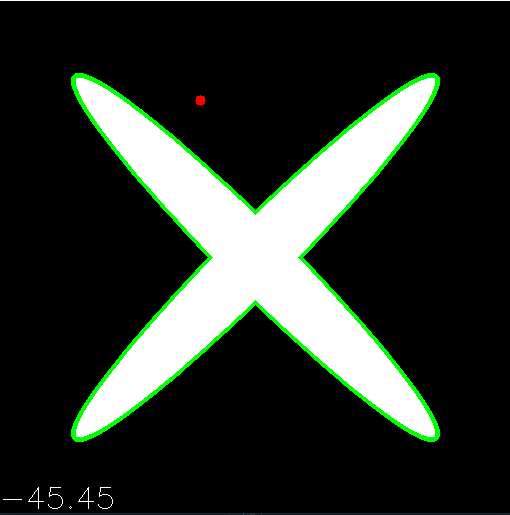